In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
import numpy as np
import tensorflow as tf

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

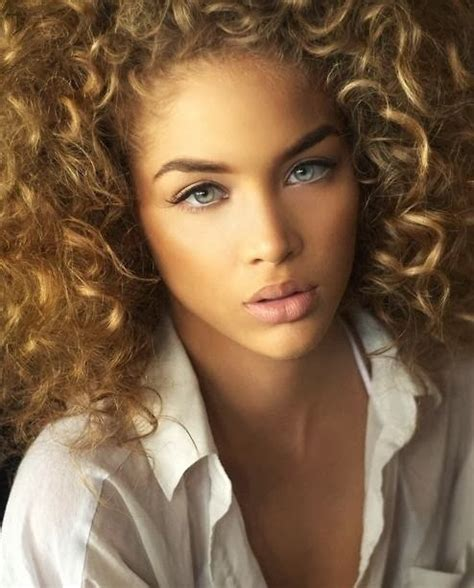

In [21]:
path = './data/train/curly'
name = 'image13.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [22]:
img = load_img(fullname, target_size=(200, 200))
x = np.array(img)
x.shape

(200, 200, 3)

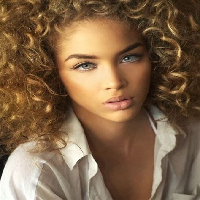

In [23]:
img

In [24]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [25]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
train_dir = 'data/train'
test_dir = 'data/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.


In [32]:
validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 201 images belonging to 2 classes.


In [33]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)


In [34]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1733256203.848020    8261 service.cc:148] XLA service 0x7f3050007f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733256203.848048    8261 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-03 20:03:23.877452: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733256203.987128    8261 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-03 20:03:24.270836: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,198,198]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,200,200]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"

 3/40 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - acc: 0.4639 - loss: 0.8078

I0000 00:00:1733256205.409865    8261 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - acc: 0.5750 - loss: 0.7139

2024-12-03 20:03:30.830532: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,198,198]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,200,200]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - acc: 0.5759 - loss: 0.7130 - val_acc: 0.6269 - val_loss: 0.6403
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - acc: 0.6600 - loss: 0.6030 - val_acc: 0.6119 - val_loss: 0.6495
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - acc: 0.6839 - loss: 0.6020 - val_acc: 0.6418 - val_loss: 0.6505
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - acc: 0.7062 - loss: 0.5508 - val_acc: 0.6418 - val_loss: 0.6326
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - acc: 0.7187 - loss: 0.5358 - val_acc: 0.6667 - val_loss: 0.5960
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - acc: 0.7379 - loss: 0.5193 - val_acc: 0.6816 - val_loss: 0.5890
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - acc: 0.7752 - loss: 0.4751 - val_acc: 0.6219 - val_loss: 0.6941
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - acc: 0.7568 - loss: 0.4977 - val_acc: 0.6965 - val_loss: 0.5772
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - acc: 0.8086 -

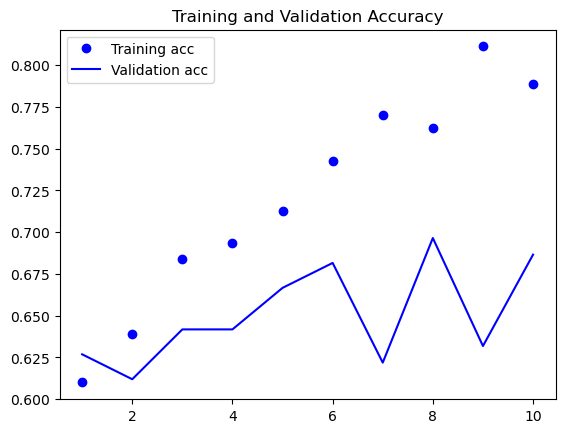

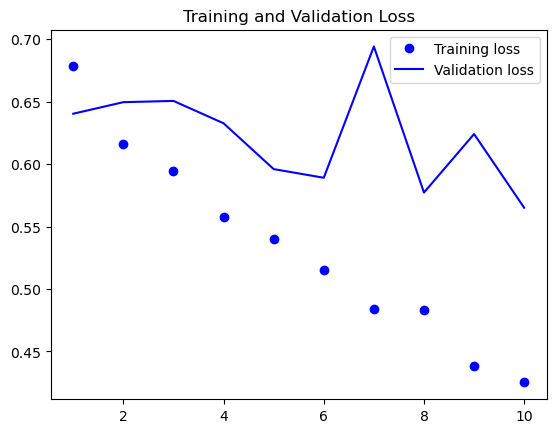

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [36]:
acc_median = np.median(acc)
acc_median

np.float64(0.7274999916553497)

In [37]:
loss_std = np.std(loss)
loss_std

np.float64(0.07639113815343936)